In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
df = pd.read_csv('/content/drive/MyDrive/Human_Development_Index_Dataset.csv', encoding='latin1')
df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
5,6,AFG,Afghanistan,1995,0.318,52.544,16.418912,NaN,NaN,54.087,...,NaN,NaN,1.676049,9.093722,NaN,NaN,NaN,NaN,0.086321,2.1968
6,7,AFG,Afghanistan,1996,0.326,53.243,17.106596,NaN,NaN,54.806,...,NaN,NaN,1.773336,9.246831,NaN,NaN,NaN,NaN,0.080092,2.0402
7,8,AFG,Afghanistan,1997,0.330,53.634,17.788819,NaN,NaN,55.151,...,NaN,NaN,1.870624,9.399939,NaN,NaN,NaN,NaN,0.073316,2.1297
8,9,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,...,NaN,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010
9,10,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,...,NaN,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832


#**Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)**

#1. Extract Latest Year:

 • Identify unique years in the dataset.

 • Filter the dataset to include only observations from the year 2022.

 • Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [172]:
# Identify unique years
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [173]:
# Filter dataset for 2022
hdi_2022_df = df[df['year'] == 2022]
# Verify
hdi_2022_df.shape

(206, 30)

#2. Data Exploration:

• Display the first 10 rows of the 2022 dataset.

• Count the number of rows and columns.

• List all column names and their data types.

In [174]:
# First 10 rows of the 2022 dataset
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [175]:
#Count the number of rows and columns
rows, cols = hdi_2022_df.shape

print("The number of rows is: ", rows)
print("The number of columns is: ", cols)


The number of rows is:  206
The number of columns is:  30


In [176]:
#All column names and their data types
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


#3. Missing Values & Data Cleaning:

• Check for missing values in each column and report total counts.

• Inspect dataset for:

– numeric columns stored as text,

– inconsistent or misspelled country names,

– duplicate rows,

– special characters (e.g., “–”) representing missing data.

• Apply necessary cleaning steps:

– convert data types where needed,

– remove duplicates,

– handle missing values (drop or impute; justify your choice).

In [177]:
#missing values in each column and report total counts
missing_value=hdi_2022_df.isnull().sum()
print("Missing value per column is: ")
missing_value

Missing value per column is: 


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [178]:
# Select columns that should be numeric
numeric_columns = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

# Check current data types
hdi_2022_df[numeric_columns].dtypes


,0
hdi,float64
life_expectancy,float64
gross_inc_percap,float64
gender_development,float64


In [179]:
# #inconsistent or misspelled country names
hdi_2022_df['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [180]:
# Check number of duplicate rows
duplicates = hdi_2022_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [181]:
# Remove duplicate rows
hdi_2022 = hdi_2022_df.drop_duplicates()
hdi_2022


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
65,66,ALB,Albania,2022,0.789,76.833000,2.842321,0.780277,0.798432,79.472000,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700
98,99,DZA,Algeria,2022,0.745,77.129000,44.903225,0.681844,0.773800,78.457000,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900
131,132,AND,Andorra,2022,0.884,83.552000,0.079824,NaN,NaN,85.838000,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929000,35.588987,0.560890,0.619680,64.541000,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,6666,ZZG.ECA,Europe and Central Asia,2022,0.802,73.564575,247.791584,0.785084,0.815007,77.021724,...,0.963,0.224,83.748828,89.899225,26.012512,73.987488,45.388503,69.591635,5.308463,10.907875
6698,6699,ZZH.LAC,Latin America and the Caribbean,2022,0.763,73.715085,655.268078,0.758014,0.765042,76.886510,...,0.991,0.386,64.359830,64.202583,34.100834,65.899166,51.625204,75.301374,2.629329,12.354312
6731,6732,ZZI.SA,South Asia,2022,0.641,68.441543,2007.549714,0.580274,0.678378,70.384339,...,0.855,0.478,40.903060,55.677277,17.930080,82.069920,28.110055,76.307951,1.875161,4.882850
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915,0.565,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977


In [182]:
# Replace special character '–' with NaN
hdi_2022_df = hdi_2022_df.replace("–", pd.NA)

In [183]:
#Convert data types where needed
hdi_2022_df["hdi"] = pd.to_numeric(hdi_2022_df["hdi"], errors="coerce")

In [184]:
# Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()

In [185]:
#Handle missing values
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])

In [186]:
df.describe()

,Unnamed: 0,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
count,6798.000000,6798.000000,6171.000000,6798.000000,6798.000000,5014.000000,5014.000000,6798.000000,6798.000000,6550.000000,...,5014.000000,4711.000000,5817.000000,5817.000000,6269.000000,6269.000000,5310.000000,5310.000000,6713.000000,5344.000000
mean,3399.500000,2006.000000,0.670293,68.544884,122.703025,0.671530,0.713682,71.189861,65.988507,11.980679,...,0.931731,0.390031,49.855594,56.345271,16.507989,83.492011,49.318145,72.360992,4.520991,12.769886
std,1962.557897,9.522605,0.164414,9.501335,561.825531,0.166486,0.143888,9.911176,9.195583,3.430510,...,0.075246,0.192830,29.853427,27.272712,10.928861,10.928861,15.797188,9.196551,6.241956,12.359313
min,1.000000,1990.000000,0.212000,14.098000,0.009182,0.191917,0.274102,15.663000,13.071000,1.942090,...,0.383000,0.009000,0.420000,2.050000,0.010000,42.452830,5.610000,29.630000,0.019352,0.000100
25%,1700.250000,1998.000000,0.546500,62.687250,1.989805,0.552527,0.611195,65.038500,60.216750,9.966379,...,0.898000,0.224000,23.369720,33.802000,8.333333,77.272727,40.552500,66.720000,0.624496,4.137650
50%,3399.500000,2006.000000,0.692000,70.491500,7.914909,0.694996,0.728110,73.684000,67.460500,12.072135,...,0.954000,0.404000,49.100111,54.533215,14.545455,85.454545,50.780000,73.020000,2.340953,8.523550
75%,5098.750000,2014.000000,0.797000,75.419894,28.194687,0.804586,0.817185,78.549500,72.582500,14.474123,...,0.982000,0.547500,76.408417,81.527327,22.727273,91.666667,58.235000,78.600000,6.221754,17.442200
max,6798.000000,2022.000000,0.967000,86.895000,7940.608797,0.957148,0.977383,88.881000,85.055000,23.247681,...,1.072000,0.838000,100.000000,100.000000,57.547170,99.990000,94.400000,100.000000,76.612949,140.815700


#4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.

• Identify the country with the highest HDI in 2022.

• Identify the country with the lowest HDI in 2022.

In [187]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print("The mean is: ", mean_hdi)
print("The median is: ", median_hdi)
print("The Standard deviation is: ", std_hdi)

The mean is:  0.7228872549019609
The median is:  0.7395
The Standard deviation is:  0.15302880386427825


In [188]:
#country with the highest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]

,5609
country,Switzerland
hdi,0.967


In [189]:
#country with the lowest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]

,5345
country,Somalia
hdi,0.38


#5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.

• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.

• Display the top 10 countries.

In [190]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

In [191]:
high_hdi_sorted_df = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

In [192]:
high_hdi_sorted_df[['country', 'hdi', 'gross_inc_percap']].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


#6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

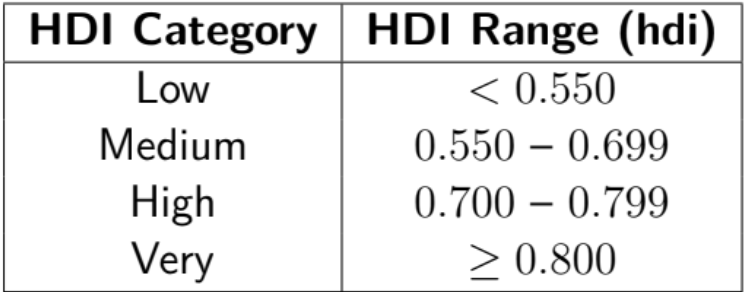

After creating this new column:

• verify that all countries are classified correctly,

• ensure the updated dataframe includes the new category column.


In [193]:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"


In [194]:
hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(hdi_category)

In [195]:
hdi_2022_df["HDI Category"].value_counts()

,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [196]:
hdi_2022_df['HDI Category'].value_counts()

,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [197]:
#Ensure column exists
hdi_2022_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI Category
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN,Very High
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium


In [198]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

#**Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)**


#1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.

• Save the filtered dataset as HDI problem1B.csv.

• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [199]:
# Filter dataset for years 2020, 2021, and 2022
hdi_problem1B_df = df[df['year'].isin([2020, 2021, 2022])]
#Verify filtered data
hdi_problem1B_df['year'].unique()

array([2020, 2021, 2022])

In [200]:
# Save the filtered dataset
hdi_problem1B_df.to_csv("HDI problem1B.csv", index=False)

In [201]:
hdi_problem1B_df[['hdi', 'country', 'year']].isnull().sum()

,0
hdi,8
country,0
year,0


#2. Data Cleaning:
• Check for missing values in the following essential columns:

– hdi

– country

– year

• Identify and address the following issues:

– missing or null values,

– inconsistent or misspelled country names,

– duplicate rows,

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

• Apply and justify cleaning steps, including:

– handling missing values (dropping or imputing),

– converting data types appropriately,

– removing duplicate entries,

– ensuring consistent naming conventions for countries and years.


In [202]:
# Check missing values in essential columns
hdi_problem1B_df[['hdi', 'country', 'year']].isnull().sum()


,0
hdi,8
country,0
year,0


In [203]:
#missing or null values
hdi_problem1B_df.dtypes
hdi_problem1B_df['hdi'].unique()

array([0.488, 0.473, 0.462, 0.784, 0.785, 0.789, 0.73 , 0.74 , 0.745,
       0.843, 0.855, 0.884, 0.594, 0.59 , 0.591, 0.82 , 0.819, 0.826,
       0.841, 0.844, 0.849, 0.769, 0.774, 0.786, 0.948, 0.949, 0.946,
       0.916, 0.92 , 0.926, 0.722, 0.738, 0.76 , 0.798, 0.799, 0.888,
       0.657, 0.662, 0.67 , 0.803, 0.809, 0.8  , 0.801, 0.93 , 0.938,
       0.942, 0.705, 0.698, 0.7  , 0.501, 0.502, 0.504, 0.675, 0.677,
       0.681, 0.691, 0.776, 0.779, 0.701, 0.68 , 0.708, 0.758, 0.756,
       0.827, 0.824, 0.823, 0.802, 0.796, 0.446, 0.445, 0.438, 0.419,
       0.42 , 0.649, 0.65 , 0.661, 0.596, 0.6  , 0.585, 0.581, 0.587,
       0.928, 0.934, 0.935, 0.389, 0.387, 0.396, 0.393, 0.394, 0.856,
       0.86 , 0.781, 0.788, 0.752, 0.588, 0.586, 0.598, 0.593, 0.477,
       0.475, 0.481, 0.811, 0.804, 0.806, 0.53 , 0.534, 0.867, 0.878,
       0.759, 0.742, 0.764, 0.9  , 0.901, 0.907, 0.891, 0.895, 0.947,
       0.952, 0.512, 0.515, 0.737, 0.766, 0.734, 0.746, 0.765, 0.729,
       0.726, 0.728,

In [204]:
#inconsistent or misspelled country names
hdi_problem1B_df['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [205]:
#duplicate rows
hdi_problem1B_df.duplicated().sum()

np.int64(0)

In [206]:
# Replace special character representing missing data
hdi_problem1B_df = hdi_problem1B_df.replace("–", pd.NA)


In [207]:
#handling missing values (dropping or imputing)
hdi_problem1B_df = hdi_problem1B_df.dropna(
    subset=['hdi', 'country', 'year'])


In [208]:
#Converting data types appropriately
hdi_problem1B_df['hdi'] = hdi_problem1B_df['hdi'].astype(float)

In [209]:
#Removing duplicate entries
hdi_problem1B_df.duplicated().sum()
hdi_problem1B_df = hdi_problem1B_df.drop_duplicates()


In [210]:
# Ensure consistent country naming
hdi_problem1B_df['country'] = (
    hdi_problem1B_df['country']
    .astype(str)
    .str.strip()
    .str.title()
)

# Ensure consistent year format
hdi_problem1B_df['year'] = (
    hdi_problem1B_df['year']
    .astype(int)
)

#3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):

– Select any five countries (or five countries from a region of your choice).

– Plot HDI values for each country across the years 2020, 2021, and 2022.

– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

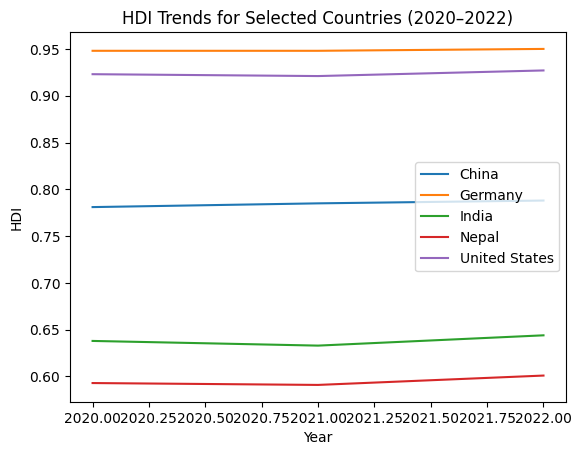

In [211]:
#Select any five countries (or five countries from a region of your choice)
selected_countries = ['China', 'Germany', 'India', 'Nepal', 'United States']

#Plot HDI values for each country across the years 202, 2021, and 2022.
country_trend_df = hdi_problem1B_df[
    hdi_problem1B_df['country'].isin(selected_countries)
]

plt.figure()

for country in selected_countries:
    country_data = country_trend_df[country_trend_df['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], label=country)

plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('HDI Trends for Selected Countries (2020–2022)')
plt.legend()
plt.show()

In [212]:
print(list(hdi_problem1B_df.columns))

['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


#• B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)

∗ Group the dataset by Region and Year.

∗ Compute the mean HDI for each region-year pair.

∗ Plot a bar chart comparing average HDI across regions for each year.

∗ Label axes clearly and include a descriptive title.




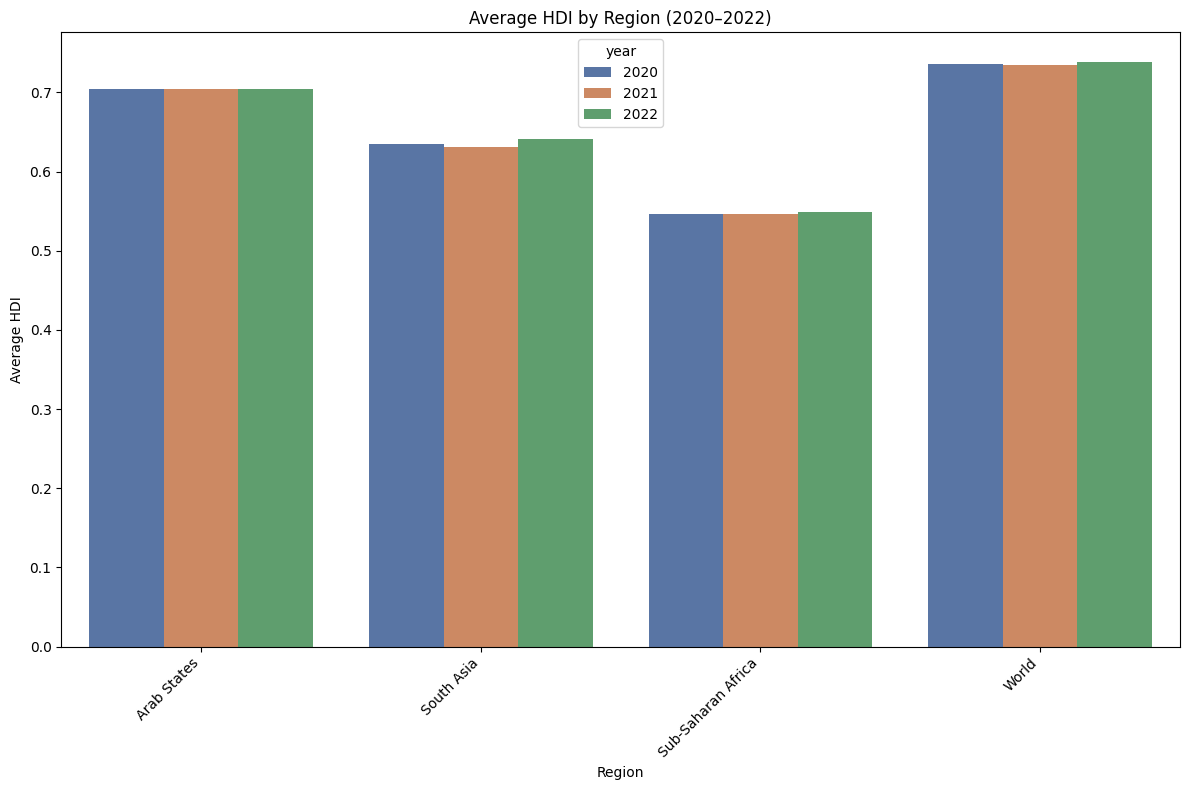

In [213]:
region_avg = (
    hdi_problem1B_df
    .groupby(['country', 'year'])['hdi']
    .mean()
    .reset_index()
)

# Filter out actual countries and keep only regions (assuming regions are listed as countries in the data)
regional_names = [
    'Arab States',
    'East Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
region_avg = region_avg[region_avg['country'].isin(regional_names)]
region_avg = region_avg.rename(columns={'country': 'region'})

plt.figure(figsize=(12,8))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year', palette='deep')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.tight_layout()
plt.show()

– Box Plot: HDI Distribution for 2020, 2021, and 2022

∗ Filter the dataset for the years 2020, 2021, and 2022.

∗ Create a box plot showing HDI spread for each of the three years.

∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

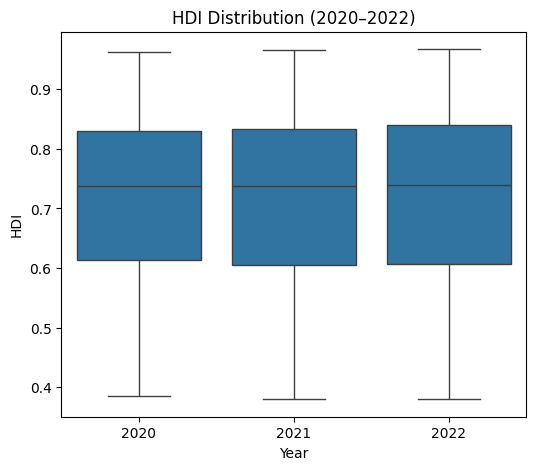

In [214]:
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_problem1B_df, x='year', y='hdi')
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution (2020–2022)")
plt.show()

– Scatter Plot: HDI vs. GNI per Capita

∗ Check if the dataset contains a column for GNI per Capita.

∗ If available:

· Create a scatter plot using HDI as the dependent variable.

· Use GNI per Capita on the x-axis.

· Add a regression line (optional).
∗ If the variable is missing, write:

"GNI per Capita variable not available in the dataset."

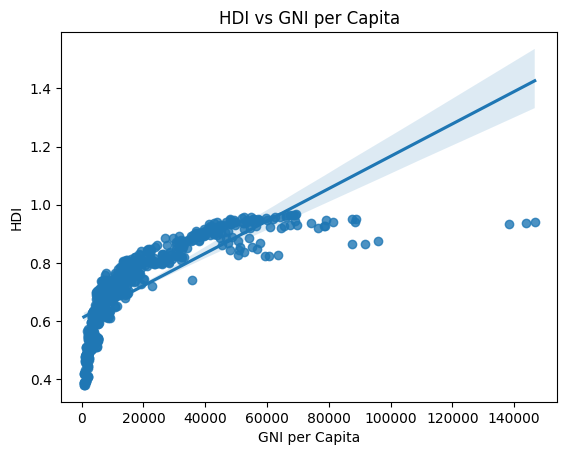

In [215]:
# Check if GNI per Capita column exists in the dataset
if 'gross_inc_percap' in hdi_problem1B_df.columns:

    sns.regplot(
        data=hdi_problem1B_df,
        x='gross_inc_percap',
        y='hdi'
    )

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita")
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")


#**Problem 2 Advanced HDI Exploration**
#1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].

• Filter the HDI dataset to include only these countries.

• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [216]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = df[df['country'].isin(south_asia)]
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
south_asia_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


#2. Composite Development Score:
• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}

Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"

• Rank South Asian countries based on Composite Score.

• Plot the top 5 countries in a horizontal bar chart.



In [252]:
# Composite Development Score:
south_asia_df["life_expectancy"] = pd.to_numeric(
    south_asia_df["life_expectancy"], errors='coerce'
)

south_asia_df.loc[:, "gross_inc_percap"] = pd.to_numeric(
    south_asia_df["gross_inc_percap"], errors="coerce"
)

# Life Expectancy Index
south_asia_df.loc[:, "life_expectancy_index"] = (
    (south_asia_df["life_expectancy"] - south_asia_df["life_expectancy"].min()) /
    (south_asia_df["life_expectancy"].max() - south_asia_df["life_expectancy"].min())
)
# GNI per Capita Index
south_asia_df.loc[:, "gni_index"] = (
    (south_asia_df["gross_inc_percap"] - south_asia_df["gross_inc_percap"].min()) /
    (south_asia_df["gross_inc_percap"].max() - south_asia_df["gross_inc_percap"].min())
)
# composite score formula
south_asia_df.loc[:, "Composite Score"] = (
    0.30 * south_asia_df["life_expectancy_index"] +
    0.30 * south_asia_df["gni_index"]
)

#Ranking South Asian countries based on Composite Score.
avg_composite = (
    south_asia_df
    .groupby("country", as_index=False)["Composite Score"]
    .mean()
)
top5_avg = avg_composite.sort_values(
    "Composite Score", ascending=False
).head(5)
top5_avg




,country,Composite Score
4,Maldives,0.541439
7,Sri Lanka,0.421424
2,Bhutan,0.310332
1,Bangladesh,0.253315
3,India,0.190708


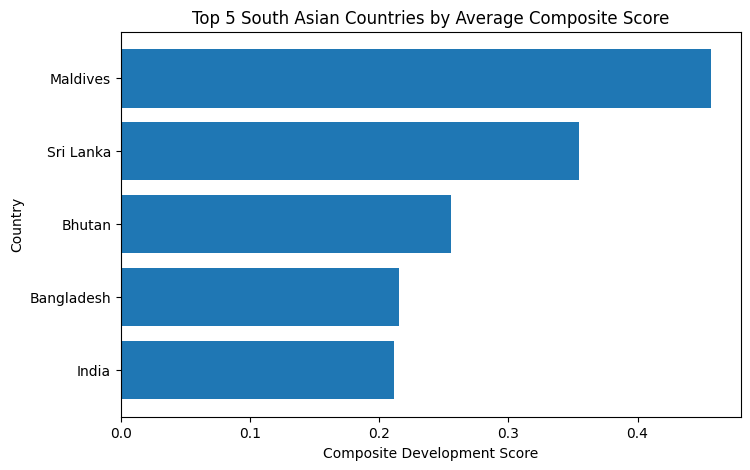

In [218]:
# top 5 countries in a horizontal bar chart.
plt.figure(figsize=(8, 5))
plt.barh(top5_avg["country"], top5_avg["Composite Score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Average Composite Score")
plt.gca().invert_yaxis()
plt.show()



• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any differences.

In [219]:
# This is for comparing hdi and Composite_Score
south_asia_hdi = (
    south_asia_df
    .groupby("country", as_index=False)["hdi"]
    .mean()
    .sort_values("hdi", ascending=False)
)

south_asia_hdi

,country,hdi
7,Sri Lanka,0.715606
4,Maldives,0.682500
2,Bhutan,0.634538
3,India,0.541485
1,Bangladesh,0.531303
5,Nepal,0.504242
6,Pakistan,0.472545
0,Afghanistan,0.401030


“Although both HDI and the Composite Development Score measure human development, differences in rankings arise because the Composite Score assigns equal weights only to life expectancy and GNI per capita, whereas HDI incorporates additional dimensions such as education. As a result, countries with higher income levels may rank higher in the Composite Score despite having similar HDI values.”

#3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.

• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.



In [220]:
#Detecting outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Create a copy of the South Asia dataframe
outlier_df = south_asia_df.copy()

# Detect outliers
outlier_df['HDI Outlier'] = detect_outliers(outlier_df['hdi'])
outlier_df['GNI Outlier'] = detect_outliers(outlier_df['gross_inc_percap'])




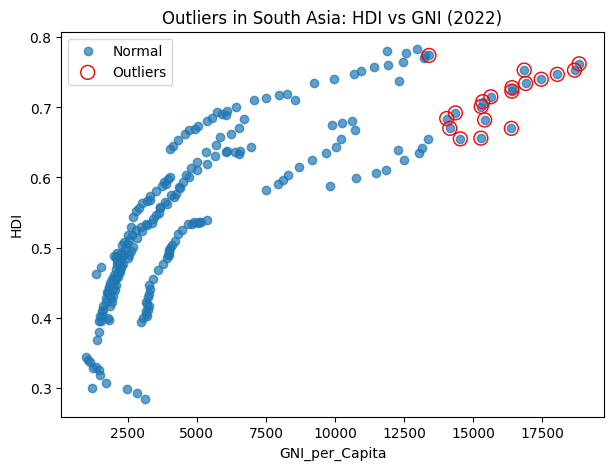

In [221]:
#scatter plot of GNI per Capita vs HDI
plt.figure(figsize=(7,5))

plt.scatter(
  outlier_df['gross_inc_percap'],
  outlier_df['hdi'],
  label='Normal',
  alpha=0.7
)

outliers = outlier_df[outlier_df['HDI Outlier'] | outlier_df['GNI Outlier']]

plt.scatter(
    outliers['gross_inc_percap'],
    outliers['hdi'],
    label='Outliers',
    edgecolors='red',
    facecolors='none',
    s=100
)

plt.xlabel("GNI_per_Capita")
plt.ylabel("HDI")
plt.title("Outliers in South Asia: HDI vs GNI (2022)")
plt.legend()
plt.show()


• Discuss why the identified countries stand out as outliers.

"The scatter plot highlights outliers in South Asia using the 1.5 × IQR rule. Maldives and Bhutan have high GNI per Capita but only moderate HDI, while Nepal and Bangladesh show relatively high HDI despite lower income. Afghanistan is an outlier with both low HDI and GNI per Capita, reflecting economic and social challenges."

#4. Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).

• Compute Pearson correlation of each metric with HDI.

• Create scatter plots with trendlines to visualize the relationships.



In [222]:
# Filter for recent years (2020–2022) first
south_asia_recent = south_asia_df[south_asia_df['year'].isin([2020, 2021, 2022])]

# Convert columns to numeric and drop missing values
metrics_df = south_asia_recent[['hdi', 'life_expectancy', 'gender_development']].apply(pd.to_numeric, errors='coerce').dropna()

# Correlation matrix
print("Correlation Matrix:\n", metrics_df.corr())

# Pearson correlations
corr_gender = metrics_df['hdi'].corr(metrics_df['gender_development'])
corr_life = metrics_df['hdi'].corr(metrics_df['life_expectancy'])

print(f"\nPearson correlation (HDI vs Gender Development): {corr_gender:.3f}")
print(f"Pearson correlation (HDI vs Life Expectancy): {corr_life:.3f}")


Correlation Matrix:
                          hdi  life_expectancy  gender_development
hdi                 1.000000         0.938764            0.874218
life_expectancy     0.938764         1.000000            0.853780
gender_development  0.874218         0.853780            1.000000

Pearson correlation (HDI vs Gender Development): 0.874
Pearson correlation (HDI vs Life Expectancy): 0.939


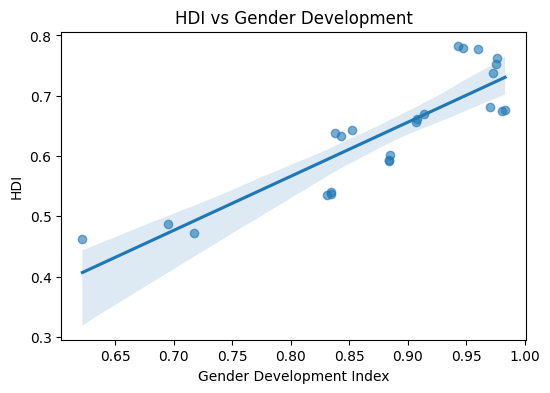

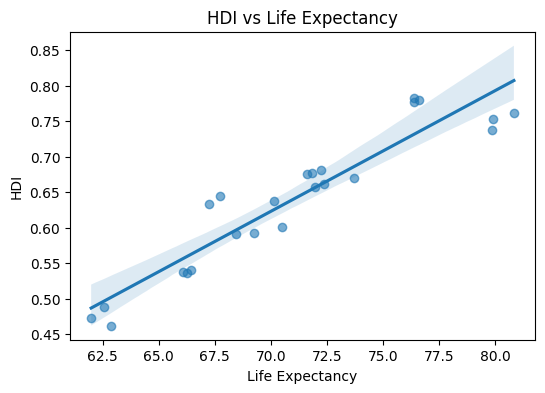

In [223]:
# Scatter plot: HDI vs Gender Development Index
plt.figure(figsize=(6, 4))
sns.regplot(
    x='gender_development',
    y='hdi',
    data=south_asia_recent,
    scatter_kws={'alpha':0.6}
)
plt.title('HDI vs Gender Development')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.show()

# Scatter plot: HDI vs Life Expectancy
plt.figure(figsize=(6, 4))
sns.regplot(
    x='life_expectancy',
    y='hdi',
    data=south_asia_recent,
    scatter_kws={'alpha':0.6}
)
plt.title('HDI vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.show()

• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

"Life expectancy shows the strongest correlation with HDI (r ≈ 0.938), while gender development has the weakest (r = 0.87) among the key metrics examined in South Asia."

#5. Gap Analysis:
• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"

• Rank South Asian countries by GNI HDI Gap in descending and ascending order.

• Plot the top 3 positive gaps and top 3 negative gaps.



In [253]:
# Creating GNI–HDI Gap
south_asia_df['GNI_HDI_Gap'] = south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
countrywise_avg_gap = (
    south_asia_df
    .groupby('country', as_index=False)['GNI_HDI_Gap']
    .mean()
)


In [225]:
#Ranking South Asian countries by GNI HDI Gap in descending order
gap_desc = countrywise_avg_gap.sort_values(
    by='GNI_HDI_Gap', ascending=False
)
gap_desc



,country,GNI_HDI_Gap
4,Maldives,14670.635594
2,Bhutan,9320.175767
7,Sri Lanka,8268.373527
6,Pakistan,3883.813530
3,India,3771.381346
1,Bangladesh,3408.490410
5,Nepal,2532.443971
0,Afghanistan,1793.487770


In [226]:

#Ranking South Asian countries by GNI HDI Gap in ascending order
gap_asc = countrywise_avg_gap.sort_values(
    by='GNI_HDI_Gap', ascending=True
)
gap_asc

,country,GNI_HDI_Gap
0,Afghanistan,1793.487770
5,Nepal,2532.443971
1,Bangladesh,3408.490410
3,India,3771.381346
6,Pakistan,3883.813530
7,Sri Lanka,8268.373527
2,Bhutan,9320.175767
4,Maldives,14670.635594


In [227]:
top3_positive = gap_desc.head(3)  # Highest GNI relative to HDI
top3_negative = gap_asc.head(3)   # Lowest GNI relative to HDI


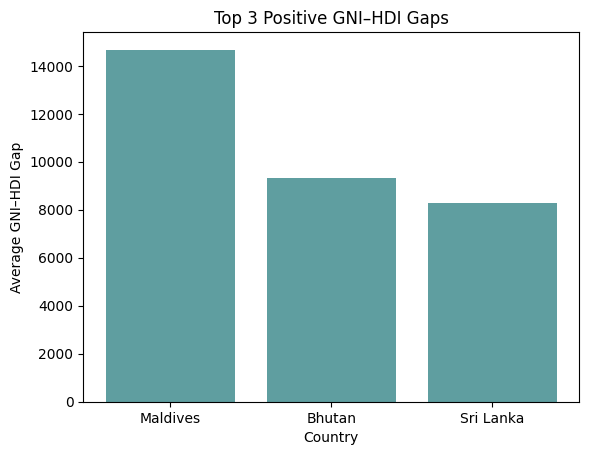

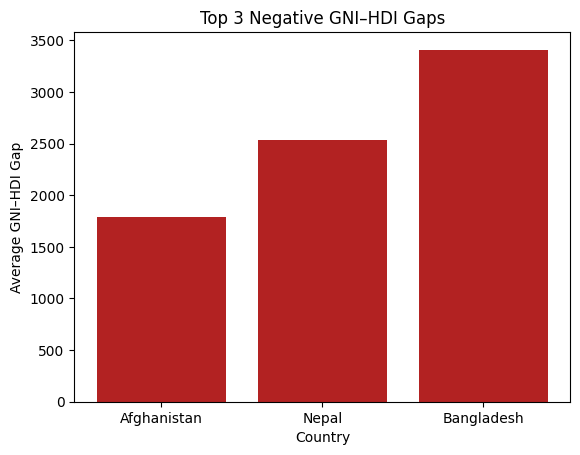

In [228]:
plt.figure()
plt.bar(top3_positive['country'], top3_positive['GNI_HDI_Gap'], color='cadetblue')
plt.title('Top 3 Positive GNI–HDI Gaps')
plt.xlabel('Country')
plt.ylabel('Average GNI–HDI Gap')
plt.show()

plt.figure()
plt.bar(top3_negative['country'], top3_negative['GNI_HDI_Gap'], color='firebrick')
plt.title('Top 3 Negative GNI–HDI Gaps')
plt.xlabel('Country')
plt.ylabel('Average GNI–HDI Gap')
plt.show()


• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

"Countries with a positive gap have relatively higher income levels but lower human development outcomes.A high positive GNI–HDI gap suggests that despite strong income levels, human development outcomes lag behind, indicating inequality or underinvestment in social sectors."

GNI alone is not a sufficient measure of development.


HDI provides a broader view by including health and education.


The gap analysis highlights structural inequalities and policy effectiveness across South Asian countries.

#**Problem 3 Comparative Regional Analysis: South Asia vs Middle East**

#1. Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].

• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.

• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [229]:
#dataset from Problem 1B
df = pd.read_csv("/content/HDI problem1B.csv")

# Creating Middle East Subset:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = df[df['country'].isin(south_asia_countries)]
middle_east_df = df[df['country'].isin(middle_east_countries)]

In [230]:
#Saving these subsets
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

#2. Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.



In [231]:
#mean and standard deviation
south_asia_mean = south_asia_df['hdi'].mean()
south_asia_std = south_asia_df['hdi'].std()

middle_east_mean = middle_east_df['hdi'].mean()
middle_east_std = middle_east_df['hdi'].std()

print("South Asia HDI Statistics (2020–2022)")
print("Mean HDI:", round(south_asia_mean, 3))
print("Standard Deviation:", round(south_asia_std, 3))

print("\nMiddle East HDI Statistics (2020–2022)")
print("Mean HDI:", round(middle_east_mean, 3))
print("Standard Deviation:", round(middle_east_std, 3))

if south_asia_mean > middle_east_mean:
    print("\nSouth Asia performs better on average (higher HDI).")
else:
    print("\nMiddle East performs better on average (higher HDI).")



South Asia HDI Statistics (2020–2022)
Mean HDI: 0.64
Standard Deviation: 0.098

Middle East HDI Statistics (2020–2022)
Mean HDI: 0.789
Standard Deviation: 0.141

Middle East performs better on average (higher HDI).


• Identify which region performs better on average.

"The Middle East region performs better on average, as it has a higher mean HDI compared to South Asia across the years 2020–2022.
Additionally, the lower standard deviation (if observed) suggests more consistency in human development levels within the Middle East region."

#3. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across the two regions.

In [232]:
#Top and Bottom Performers:
# Average HDI per country (2020–2022)
sa_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

In [233]:
# Top and bottom performers
sa_top3 = sa_avg.head(3)
sa_bottom3 = sa_avg.tail(3)

print("South Asia – Top 3:\n", sa_top3)
print("\nSouth Asia – Bottom 3:\n", sa_bottom3)


South Asia – Top 3:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia – Bottom 3:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64


In [234]:
me_top3 = me_avg.head(3)
me_bottom3 = me_avg.tail(3)
print("\nMiddle East – Top 3:\n", me_top3)
print("\nMiddle East – Bottom 3:\n", me_bottom3)


Middle East – Top 3:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East – Bottom 3:
 country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


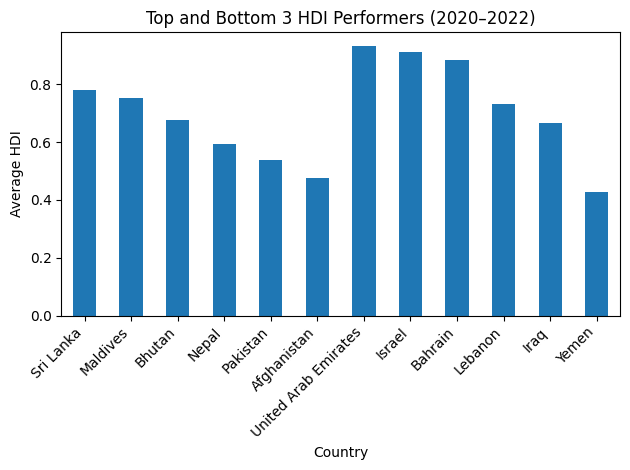

In [235]:
# Combining all top and bottom performers
combined = pd.concat([
    sa_top3, sa_bottom3,
    me_top3, me_bottom3
])

plt.figure()
combined.plot(kind='bar')
plt.title("Top and Bottom 3 HDI Performers (2020–2022)")
plt.ylabel("Average HDI")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


"The results show that Middle Eastern countries dominate the top HDI rankings, reflecting stronger overall human development outcomes during 2020–2022.
In contrast, South Asian countries appear more frequently among the bottom performers, indicating lower average HDI levels and greater development challenges within the region."

#4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:

– Gender Development Index {"gender development"}

– Life Expectancy Index {"life expectancy"}

– GNI per Capita Index {"gross inc percap"}



In [236]:
#Metric Comparisons:
# Convert metrics to numeric
metric_cols = ["gender_development", "life_expectancy", "gross_inc_percap"]

for col in metric_cols:
  south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
  middle_east_df = df[df['country'].isin(middle_east_countries)].copy()
# Compute regional means (2020–2022)
sa_means = south_asia_df[metric_cols].mean()
me_means = middle_east_df[metric_cols].mean()
sa_means
me_means


,0
gender_development,0.896545
life_expectancy,75.855455
gross_inc_percap,37750.770520


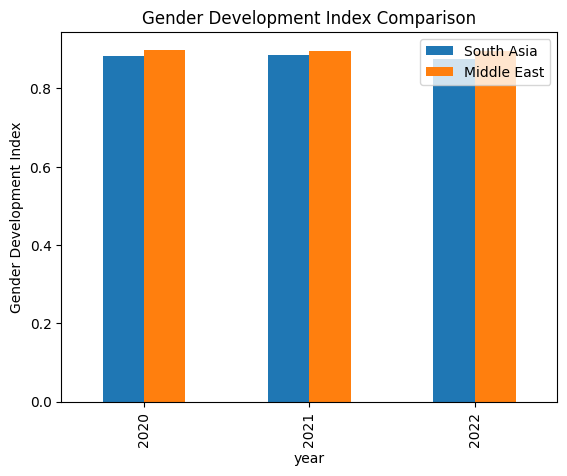

In [237]:
metric_df = pd.DataFrame({
    'South Asia': south_asia_df.groupby('year')['gender_development'].mean(),
    'Middle East': middle_east_df.groupby('year')['gender_development'].mean()
})

metric_df.plot(kind='bar')
plt.ylabel("Gender Development Index")
plt.title("Gender Development Index Comparison")
plt.show()

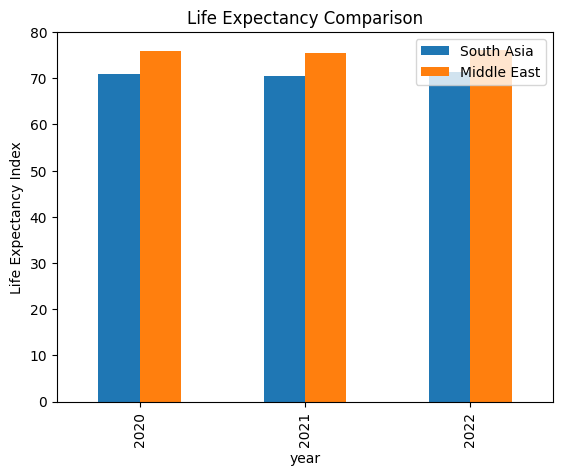

In [238]:
metric_df = pd.DataFrame({
    'South Asia': south_asia_df.groupby('year')['life_expectancy'].mean(),
    'Middle East': middle_east_df.groupby('year')['life_expectancy'].mean()
})

metric_df.plot(kind='bar')
plt.ylabel("Life Expectancy Index")
plt.title("Life Expectancy Comparison")
plt.show()


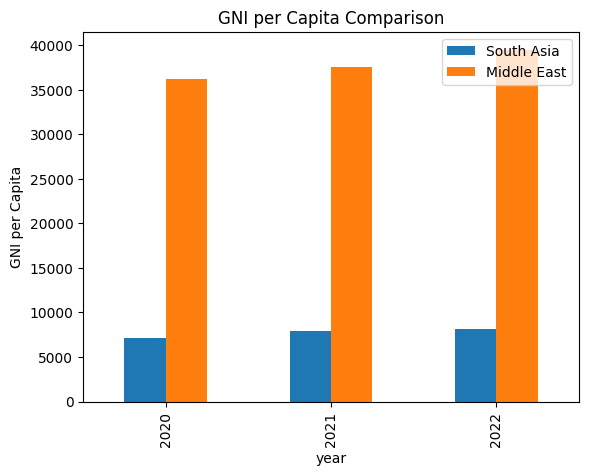

In [239]:
metric_df = pd.DataFrame({
    'South Asia': south_asia_df.groupby('year')['gross_inc_percap'].mean(),
    'Middle East': middle_east_df.groupby('year')['gross_inc_percap'].mean()
})

metric_df.plot(kind='bar')
plt.ylabel("GNI per Capita")
plt.title("GNI per Capita Comparison")
plt.show()


• Identify which metric shows the greatest disparity between regions.

"Among the three metrics, GNI per Capita Index shows the greatest disparity between South Asia and the Middle East. While differences in gender development and life expectancy exist, income levels vary far more significantly across regions, reflecting stronger economic capacity in Middle Eastern countries compared to South Asia during 2020–2022."

#5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.

• Compute the coefficient of variation (CV = std/mean) for HDI.
• Identify which region exhibits more variation in HDI.

In [240]:
#HDI Disparity:
#range (max – min) of HDI for each region.
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

#coefficient of variation (CV = std/mean) for HDI.
sa_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
me_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()


In [241]:
print("South Asia HDI Range:", round(sa_range, 3))
print("South Asia HDI CV:", round(sa_cv, 3))

print("\nMiddle East HDI Range:", round(me_range, 3))
print("Middle East HDI CV:", round(me_cv, 3))


South Asia HDI Range: 0.321
South Asia HDI CV: 0.154

Middle East HDI Range: 0.513
Middle East HDI CV: 0.179


In [242]:
if sa_cv > me_cv:
    print("\nSouth Asia exhibits more variation in HDI.")
else:
    print("\nMiddle East exhibits more variation in HDI.")



Middle East exhibits more variation in HDI.


"The Middle East exhibits greater variation in HDI, as indicated by a larger range and higher coefficient of variation compared to South Asia. This suggests wider inequality in human development outcomes among Middle Eastern countries, whereas South Asia shows comparatively more clustered HDI values."

---



#6. Correlation Analysis:
• For each region, compute correlations of HDI with:

– Gender Development Index

– Life Expectancy Index

• Create scatter plots with trendlines for each correlation.

• Interpret the strength and direction of these relationships.

In [243]:
#Correlation Analysis

# South Asia correlations
sa_corr_gdi = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
sa_corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

# Middle East correlations
me_corr_gdi = middle_east_df['hdi'].corr(middle_east_df['gender_development'])
me_corr_life = middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])

print("South Asia:")
print("HDI vs Gender Development:", round(sa_corr_gdi, 3))
print("HDI vs Life Expectancy:", round(sa_corr_life, 3))

print("\nMiddle East:")
print("HDI vs Gender Development:", round(me_corr_gdi, 3))
print("HDI vs Life Expectancy:", round(me_corr_life, 3))


South Asia:
HDI vs Gender Development: 0.874
HDI vs Life Expectancy: 0.939

Middle East:
HDI vs Gender Development: 0.936
HDI vs Life Expectancy: 0.933


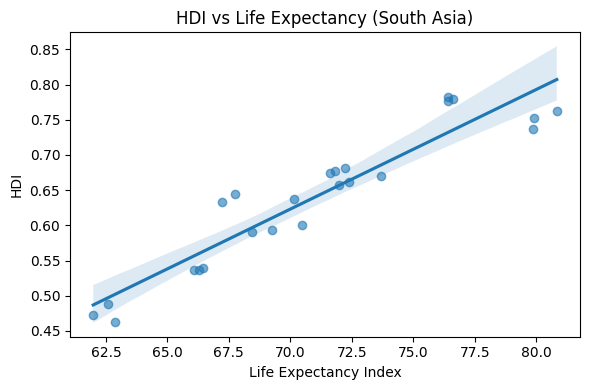

In [244]:
plt.figure(figsize=(6, 4))
sns.regplot(
    x='life_expectancy',
    y='hdi',
    data=south_asia_recent,
    scatter_kws={'alpha': 0.6}
)

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.tight_layout()
plt.show()


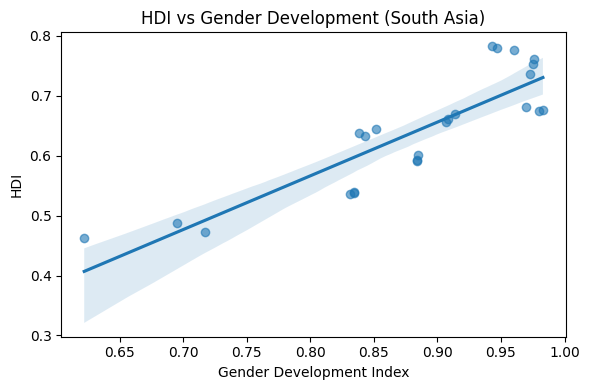

In [245]:
plt.figure(figsize=(6, 4))
sns.regplot(
    x='gender_development',
    y='hdi',
    data=south_asia_recent,
    scatter_kws={'alpha': 0.6}
)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development (South Asia)")
plt.tight_layout()
plt.show()


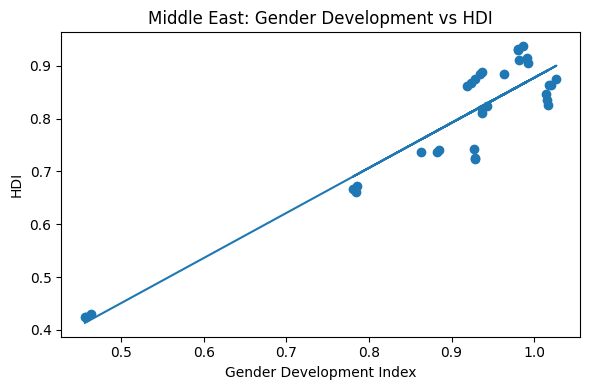

In [246]:
# Drop missing values
me_plot_df = middle_east_df[['hdi', 'gender_development']].dropna()

x = me_plot_df['gender_development']
y = me_plot_df['hdi']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Middle East: Gender Development vs HDI")
plt.tight_layout()
plt.show()


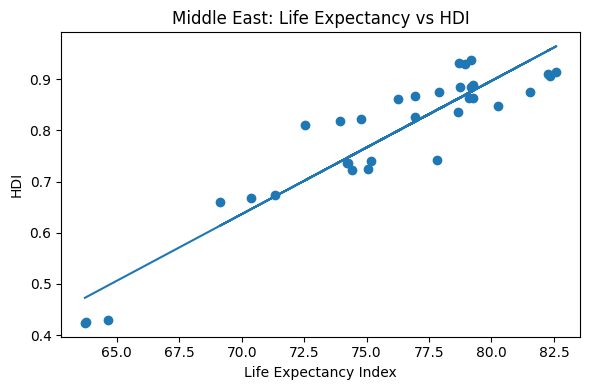

In [247]:
# Drop missing values
me_plot_df = middle_east_df[['hdi', 'life_expectancy']].dropna()

x = me_plot_df['life_expectancy']
y = me_plot_df['hdi']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Middle East: Life Expectancy vs HDI")
plt.tight_layout()
plt.show()


#7. Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.

• Create scatter plots highlighting outliers in a different color.



In [248]:
def detect_outliers_iqr(df, hdi_col='hdi', gni_col='gross_inc_percap'):
    Q1_hdi = df[hdi_col].quantile(0.25)
    Q3_hdi = df[hdi_col].quantile(0.75)
    IQR_hdi = Q3_hdi - Q1_hdi

    Q1_gni = df[gni_col].quantile(0.25)
    Q3_gni = df[gni_col].quantile(0.75)
    IQR_gni = Q3_gni - Q1_gni

    df = df.copy()
    df['is_outlier'] = (
        (df[hdi_col] < Q1_hdi - 1.5 * IQR_hdi) |
        (df[hdi_col] > Q3_hdi + 1.5 * IQR_hdi) |
        (df[gni_col] < Q1_gni - 1.5 * IQR_gni) |
        (df[gni_col] > Q3_gni + 1.5 * IQR_gni)
    )
    return df


In [249]:
south_asia_outliers = detect_outliers_iqr(south_asia_df)
middle_east_outliers = detect_outliers_iqr(middle_east_df)

print("South Asia Outliers:")
print(south_asia_outliers[south_asia_outliers['is_outlier']]
      [['country', 'hdi', 'gross_inc_percap']])

print("\nMiddle East Outliers:")
print(middle_east_outliers[middle_east_outliers['is_outlier']]
      [['country', 'hdi', 'gross_inc_percap']])


South Asia Outliers:
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []

Middle East Outliers:
    country    hdi  gross_inc_percap
576   Yemen  0.430       1152.015672
577   Yemen  0.425       1112.162989
578   Yemen  0.424       1105.763435


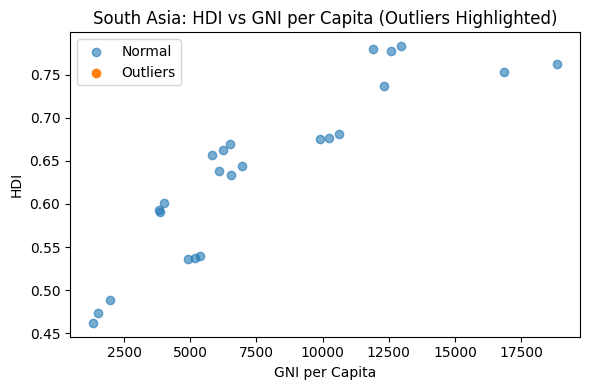

In [250]:
plt.figure(figsize=(6, 4))
plt.scatter(
    south_asia_outliers['gross_inc_percap'],
    south_asia_outliers['hdi'],
    alpha=0.6,
    label='Normal'
)

plt.scatter(
    south_asia_outliers[south_asia_outliers['is_outlier']]['gross_inc_percap'],
    south_asia_outliers[south_asia_outliers['is_outlier']]['hdi'],
    label='Outliers'
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()


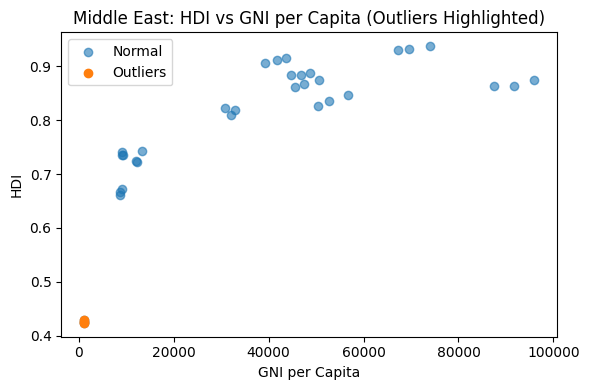

In [251]:
plt.figure(figsize=(6, 4))
plt.scatter(
    middle_east_outliers['gross_inc_percap'],
    middle_east_outliers['hdi'],
    alpha=0.6,
    label='Normal'
)

plt.scatter(
    middle_east_outliers[middle_east_outliers['is_outlier']]['gross_inc_percap'],
    middle_east_outliers[middle_east_outliers['is_outlier']]['hdi'],
    label='Outliers'
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()


• Discuss the significance of these outliers.

"The outlier analysis using the 1.5 × IQR rule reveals the presence of countries with exceptionally high or low HDI and GNI per capita values in both regions. In particular, Middle Eastern outliers are more pronounced in GNI per capita, reflecting strong income disparities driven by natural resource endowments. These outliers are important as they can influence averages, correlations, and regional comparisons, and therefore should be interpreted cautiously in development analysis."